#Ejemplo 14: Regresión con Keras

This notebook uses the classic Auto MPG Dataset and builds a model to predict the fuel efficiency of late-1970s and early 1980s automobiles. To do this, we'll provide the model with a description of many automobiles from that time period. This description includes attributes like: cylinders, displacement, horsepower, and weight.

##Paso 1: Gestión de los datos

En primer lugar, se cargan las bibliotecas necesarias para la gestión de datos

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**1.1-Carga de datos**

En este caso, los datos están disponibles como un CSV que se carga desde una URL. Como los datos no tiene columnas, se asocia a cada columna un nombre.

In [0]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin'] 
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

In [47]:
dataset.head()
#print(len(dataset))

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [50]:
#Sanity check
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [0]:
#Nos cargamos las vacías
dataset = dataset.dropna()
#Si ejecutamos lo anterior nos dará 0

In [51]:
#Se codifica el origen (país) con one-hot encoding.
#Se obtendrán 3 columnas que se concatenan al dataset original
dfDummies = pd.get_dummies(dataset['Origin'], prefix = 'category')
dataset = pd.concat([dataset, dfDummies], axis=1)
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,category_1,category_2,category_3
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,1,0,0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,1,0,0


In [0]:
#Se separan los datos en entrenamiento y test
train_dataset = dataset.sample(frac=0.8,random_state=0)
#Se cogen los de test a partir de los de entrenamiento
test_dataset = dataset.drop(train_dataset.index)

**1.2-Visualización de los datos**

*   Se puede comprobar la forma que tienen nuestros datos. 

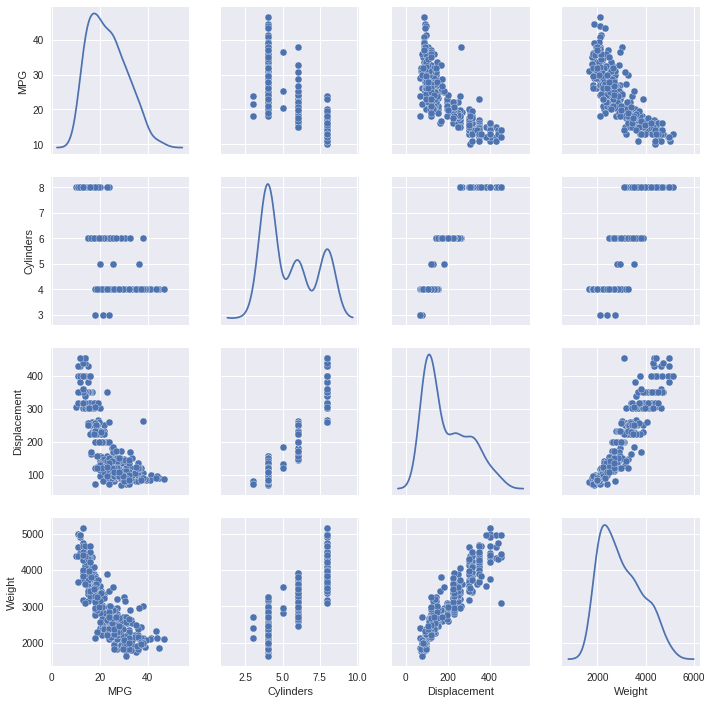

In [54]:
import seaborn as sns
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")


In [55]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Origin,314.0,1.573248,0.800988,1.0,1.00,1.0,2.00,3.0
category_1,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
category_2,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
category_3,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


**1.3-Codificar los datos**

En este caso los datos son numéricos con lo que sólo requieren procesamiento para escalarlos:

* Los datos ya son numéricos.
* Se realizar una escacla de los datos con MinMax en la zona 0-1, Una ventaja es que se da estabilidad a los datos pero, un problema es que comprime los datos de entrada entre unos límites empíricos (el máximo y el mínimo de la variable). Esto quiere decir que si existe ruido, se va a ampliar.

In [0]:
#Separar features de labels
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
training_set_scaled = sc.fit_transform(train_dataset)
test_set_scaled = sc.fit_transform(train_dataset)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


**1.4-Seleccionar los datos**

En este caso, los datos se separan por la ventana que queremos controlar (60 días).


## Paso 2: Arquitectura e implementación de nuestra red


1.   La entrada de nuestra red será una capa con 4 nodos de acuerdo a las dimensiones de nuestros datos.
2.  La función de activación en la capa de salida no se establece para que sea un número. 
4. La función de pérdida será  **mse** y **mae**.
5. La función de optimización **RMSProp**. 
6. Métricas: en este caso se selecciona sólo la precisión.

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import optimizers


In [0]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

optimizer = optimizers.RMSprop(0.001)

model.compile(loss='mean_squared_error',optimizer=optimizer, metrics=['mean_absolute_error', 'mean_squared_error'])

In [60]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________


## Paso 3:  Entrenamiento

In [37]:
example_batch = training_set_scaled[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.4063397 ],
       [ 0.04064944],
       [-0.56573236],
       [-0.13403864],
       [ 0.15474646],
       [ 0.02818918],
       [ 0.14152527],
       [ 0.28298727],
       [-0.14478952],
       [-0.3200295 ]], dtype=float32)

In [62]:
history = model.fit(training_set_scaled, train_labels, epochs=1000, validation_split = 0.2)

Train on 251 samples, validate on 63 samples
Epoch 1/1000
251/251 [==============================] - 0s 77us/step - loss: 5.8962 - mean_absolute_error: 1.6654 - mean_squared_error: 5.8962 - val_loss: 8.2385 - val_mean_absolute_error: 2.1957 - val_mean_squared_error: 8.2385
Epoch 2/1000
251/251 [==============================] - 0s 53us/step - loss: 5.9860 - mean_absolute_error: 1.6861 - mean_squared_error: 5.9860 - val_loss: 7.9640 - val_mean_absolute_error: 2.0833 - val_mean_squared_error: 7.9640
Epoch 3/1000
251/251 [==============================] - 0s 67us/step - loss: 5.9237 - mean_absolute_error: 1.6793 - mean_squared_error: 5.9237 - val_loss: 8.4374 - val_mean_absolute_error: 2.1150 - val_mean_squared_error: 8.4374
Epoch 4/1000
251/251 [==============================] - 0s 51us/step - loss: 5.8045 - mean_absolute_error: 1.6566 - mean_squared_error: 5.8045 - val_loss: 8.3325 - val_mean_absolute_error: 2.1515 - val_mean_squared_error: 8.3325
Epoch 5/1000
251/251 [=================

In [63]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,2.283287,0.946310,2.283287,9.151544,2.288703,9.151544,995
996,2.224746,0.940897,2.224746,8.934706,2.321042,8.934706,996
997,2.196243,0.928812,2.196243,9.318704,2.350913,9.318704,997
998,2.255384,0.942334,2.255384,8.464760,2.209040,8.464760,998
999,2.221149,0.933559,2.221149,8.594882,2.174999,8.594882,999


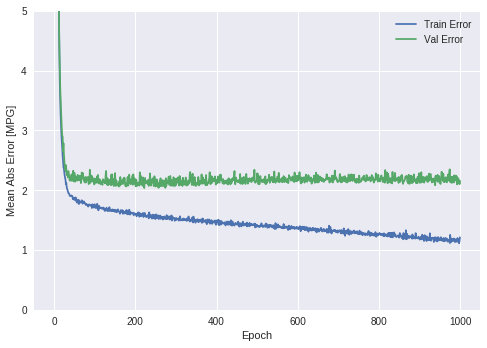

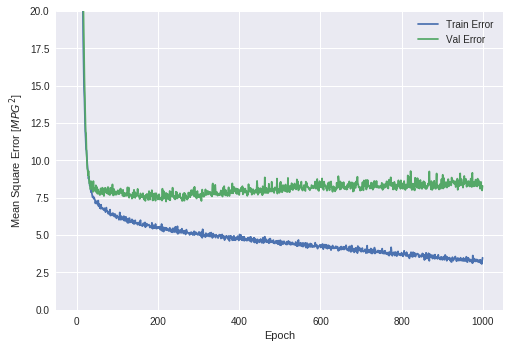

In [41]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

In [0]:
#model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop])

plot_history(history)

## Paso 4:  Test y Predicción

ValueError: ignored

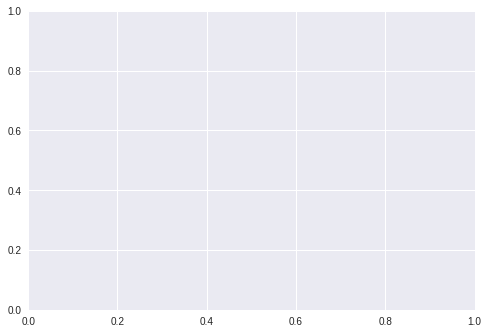

In [42]:
test_predictions = model.predict(test_set_scaled).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])